In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [9]:
dataset = pd.read_excel("Superstore_USA.xlsx")

In [11]:
dataset.head(2)

,Row ID,Order Priority,Discount,Unit Price,Shipping Cost,Customer ID,Customer Name,Ship Mode,Customer Segment,Product Category,...,Region,State or Province,City,Postal Code,Order Date,Ship Date,Profit,Quantity ordered new,Sales,Order ID
0,18606,Not Specified,0.01,2.88,0.50,2,Janice Fletcher,Regular Air,Corporate,Office Supplies,...,Central,Illinois,Addison,60101,2012-05-28,2012-05-30,1.32,2,5.90,88525
1,20847,High,0.01,2.84,0.93,3,Bonnie Potter,Express Air,Corporate,Office Supplies,...,West,Washington,Anacortes,98221,2010-07-07,2010-07-08,4.56,4,13.01,88522


In [13]:
dataset.shape

(9426, 24)

In [15]:
dataset.isnull().sum()

Row ID                   0
Order Priority           0
Discount                 0
Unit Price               0
Shipping Cost            0
Customer ID              0
Customer Name            0
Ship Mode                0
Customer Segment         0
Product Category         0
Product Sub-Category     0
Product Container        0
Product Name             0
Product Base Margin     72
Region                   0
State or Province        0
City                     0
Postal Code              0
Order Date               0
Ship Date                0
Profit                   0
Quantity ordered new     0
Sales                    0
Order ID                 0
dtype: int64

In [17]:
dataset['Product Base Margin'].fillna(dataset['Product Base Margin'].mean(),inplace=True)

In [19]:
dataset.isnull().sum()

Row ID                  0
Order Priority          0
Discount                0
Unit Price              0
Shipping Cost           0
Customer ID             0
Customer Name           0
Ship Mode               0
Customer Segment        0
Product Category        0
Product Sub-Category    0
Product Container       0
Product Name            0
Product Base Margin     0
Region                  0
State or Province       0
City                    0
Postal Code             0
Order Date              0
Ship Date               0
Profit                  0
Quantity ordered new    0
Sales                   0
Order ID                0
dtype: int64

# Order Priority

In [23]:
dataset['Order Priority'].value_counts()

Order Priority
High             1970
Low              1926
Not Specified    1881
Medium           1844
Critical         1804
Critical            1
Name: count, dtype: int64

In [25]:
dataset['Order Priority'].unique()

array(['Not Specified', 'High', 'Medium', 'Low', 'Critical', 'Critical '],
      dtype=object)

In [29]:
dataset['Order Priority'] = dataset['Order Priority'].replace("Critical ","Critical")

In [31]:
dataset['Order Priority'].unique()

array(['Not Specified', 'High', 'Medium', 'Low', 'Critical'], dtype=object)

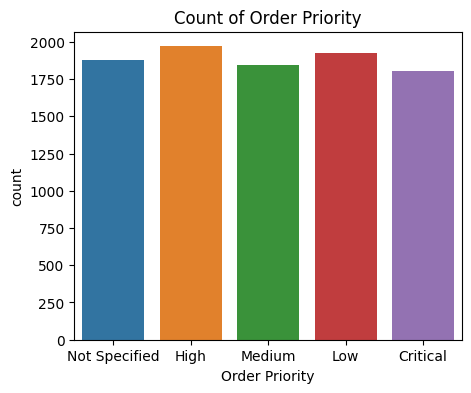

In [51]:
plt.figure(figsize=(5,4))
sns.countplot(x="Order Priority",data=dataset)
plt.title("Count of Order Priority")
plt.savefig("count of order priority.jpg")
plt.show()

# Ship Mode

In [56]:
dataset['Ship Mode'].value_counts()

Ship Mode
Regular Air       7036
Delivery Truck    1283
Express Air       1107
Name: count, dtype: int64

In [62]:
x = dataset['Ship Mode'].value_counts().index
y = dataset['Ship Mode'].value_counts().values

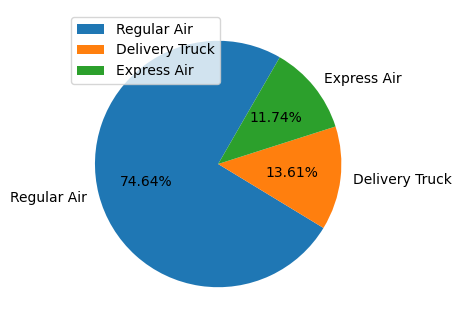

In [111]:
plt.figure(figsize=(5,4))
plt.pie(y,labels=x,startangle = 60,autopct = "%0.2f%%")
plt.legend(loc=2)
plt.savefig("ship mode pie.jpg")
plt.show()

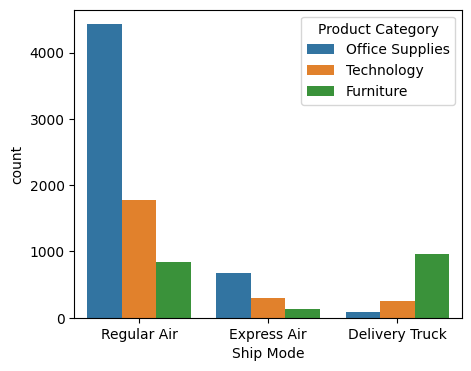

In [113]:
# Bivariate Analysis
plt.figure(figsize=(5,4))
sns.countplot(x="Ship Mode",data=dataset,hue="Product Category") # hue parameter is used for more differentiate the data
plt.savefig("ship mode bivariate.jpg")
plt.show()

# Customer Segment

In [101]:
dataset['Product Category'].value_counts().index

Index(['Office Supplies', 'Technology', 'Furniture'], dtype='object', name='Product Category')

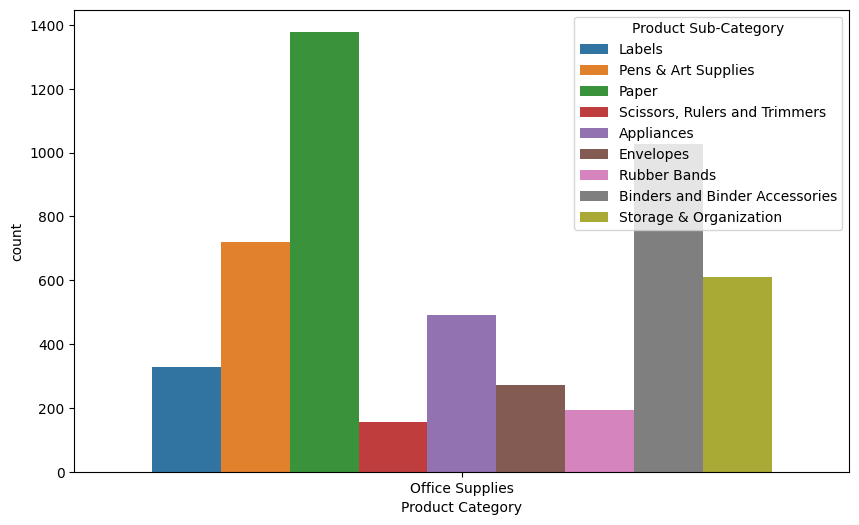

In [115]:
# Analysis of Office Supplies
plt.figure(figsize=(10,6))
sns.countplot(x="Product Category",data=dataset[dataset['Product Category']=='Office Supplies'],hue="Product Sub-Category")
plt.savefig("office supplies.jpg")
plt.show()

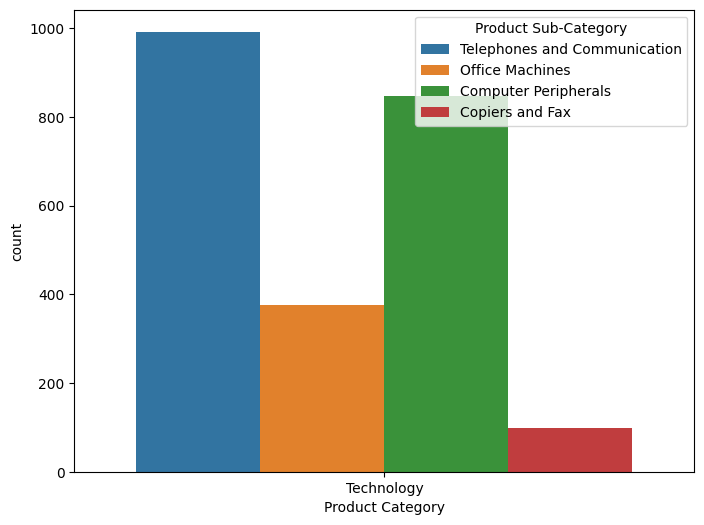

In [123]:
# Analysis of Technology
plt.figure(figsize=(8,6))
sns.countplot(x="Product Category",data=dataset[dataset['Product Category']=='Technology'],hue="Product Sub-Category")
plt.savefig("technology.jpg")
plt.show()

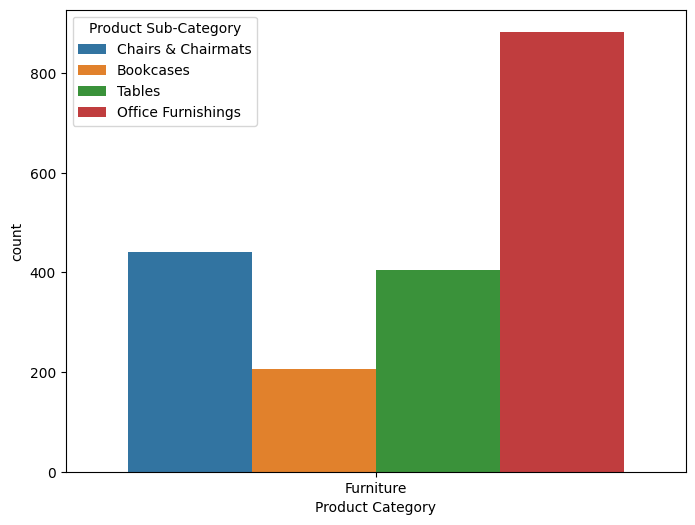

In [121]:
# Analysis of Furniture
plt.figure(figsize=(8,6))
sns.countplot(x="Product Category",data=dataset[dataset['Product Category']=='Furniture'],hue="Product Sub-Category")
plt.savefig("furniture.jpg")
plt.show()

In [131]:
# dataset.info()

In [127]:
dataset['Order Year'] = dataset['Order Date'].dt.year

In [133]:
dataset['Order Year'].value_counts()

Order Year
2013    3054
2012    2241
2011    2179
2010    1952
Name: count, dtype: int64

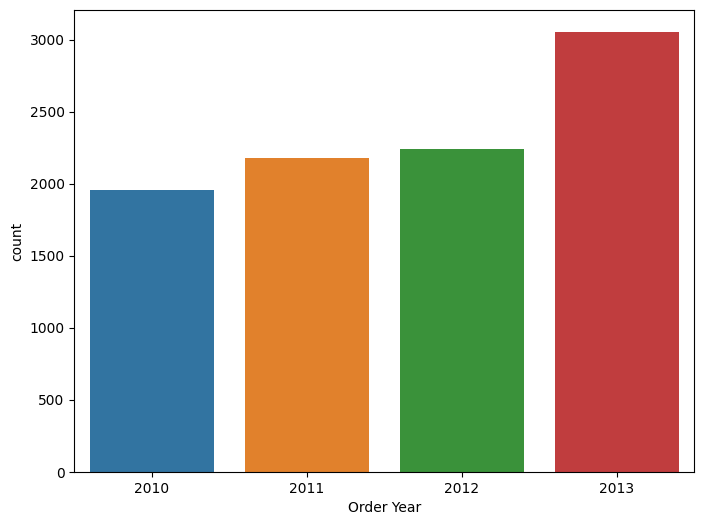

In [135]:
# Analysis of Order Year
plt.figure(figsize=(8,6))
sns.countplot(x="Order Year",data=dataset)
plt.savefig("order year.jpg")
plt.show()

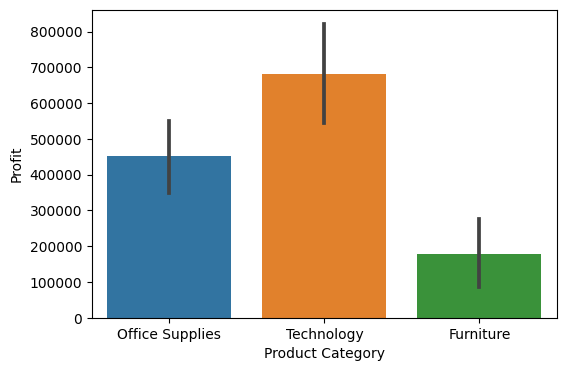

In [151]:
# bar plot to show profit in a particular product category
plt.figure(figsize=(6,4))
sns.barplot(x="Product Category",y="Profit",data=dataset,estimator="sum")
plt.savefig("profits.jpg")
plt.show()

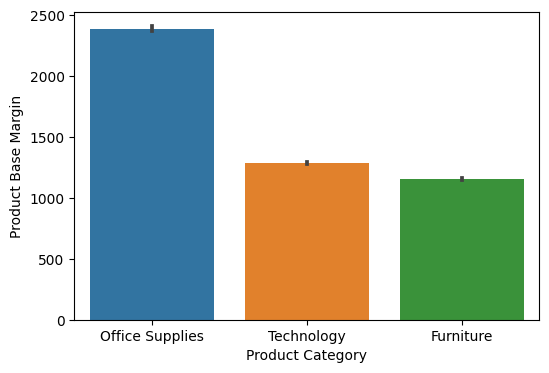

In [153]:
# bar plot to show profit Margin in a particular product category
plt.figure(figsize=(6,4))
sns.barplot(x="Product Category",y="Product Base Margin",data=dataset,estimator="sum")
plt.savefig("profit margin.jpg")
plt.show()

In [149]:
dataset['State or Province'].value_counts()[:5]

State or Province
California    1021
Texas          646
Illinois       584
New York       574
Florida        522
Name: count, dtype: int64